# Object Detection using YOLO


<img src="./images/labeling-image-utility.png" style="width:610px"/>

In this document we are using a custom dataset that focuesses in the
detection of **Guitars** in images.

The dataset was collected **by hand** from the internet using this excellent 
utility:

https://github.com/heartexlabs/labelImg

which makes it easy to annotate and label the testing images with enclosed
rectangular "boxes" that will become the prediction objective.

The solution that is presented here is influenced and reuses the code that can be found in the following repository:

https://github.com/taipingeric/yolo-v4-tf.keras

The CNN topology followed in this notebook is known as YOLOv4 and is described in
detail in the following paper:


In [2]:
from IPython.display import IFrame
IFrame("./data/yolo-paper.pdf", width="100%", height=800)

In [31]:
from src.models import Yolov4
from src.utils import read_annotation_lines, DataGenerator

%load_ext autoreload
%autoreload 2

import os
import random
import sys

import tensorflow as tf
import keras
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

%reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Num GPUs Available:  1


In [26]:
def plot_history(history, filename=None, keys=None, skip_epochs=5):
    """Plots and saves the passed in training history.
    
    To make the graphs more valuable you can pass the number of 
    epochs to skip (always from the begining of the curve) to 
    remove the very large values that appear in the first epochs.
    Making so we can follow the deviation of the curves easier.
    
    :param history: The training history instance.
    :param str filename: The full path to the file to use.
    :param list keys: The list of keys to plot (None for all).
    :param int spip_epochs: The number of epochs to skip.
    """
    plt.clf()
    min_value, max_value = 5000, 0
    for key in history.history.keys():
        if keys and key not in keys:
            continue
        data = history.history[key][skip_epochs:]
        plt.plot(data, label=key)
        min_value = min(min_value, min(data))
        max_value = max(max_value, max(data))
    plt.ylim([min_value, max_value])
    plt.ylim([0, max_value])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    if filename:
        plt.savefig(filename)

In [20]:
IMAGES_PATH = '/home/john/repos/detect-guitar/dataset/img'
CLASSES_PATH = '/home/john/repos/detect-guitar/class_names/classes.txt'


In [21]:
# Callbacks to control training.

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                             factor = 0.1,
                                             patience = 5,
                                             restore_best_weights=True,
                                             verbose = 1)

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                          mode = 'min',
                                          verbose = 1,
                                          restore_best_weights=True,
                                          patience = 10)
callbacks = [ reduce_lr, early_stop]

In [22]:
train_lines, val_lines = read_annotation_lines('/home/john/repos/ML_Introduction/notebooks/data/guitars/anno.txt', test_size=0.1)
data_gen_train = DataGenerator(train_lines, CLASSES_PATH, IMAGES_PATH)
data_gen_val = DataGenerator(val_lines, CLASSES_PATH, IMAGES_PATH)

model = Yolov4(weight_path=None, class_name_path=CLASSES_PATH)


2022-11-08 09:56:01.610250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 09:56:02.860876: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9762 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


nms iou: 0.413 score: 0.3


/home/john/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
training_history = model.fit(
    data_gen_train, 
    initial_epoch=0,
    epochs=65, 
    val_data_gen=data_gen_val,
    callbacks=callbacks
)

Epoch 1/65
Cause: could not parse the source code of <function Yolov4.build_model.<locals>.<lambda> at 0x7f7a5c11ae60>: no matching AST found among candidates:
# coding=utf-8
lambda y_true, y_pred: y_pred
# coding=utf-8
lambda x: float(x['confidence'])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function Yolov4.build_model.<locals>.<lambda> at 0x7f7a5c11ae60>: no matching AST found among candidates:
# coding=utf-8
lambda y_true, y_pred: y_pred
# coding=utf-8
lambda x: float(x['confidence'])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-11-08 09:56:42.843102: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-11-08 09:56:44.456021: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-08 09:56:45.847238: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-08 09:56:45.847320: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-11-08 09:56:45.847354: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to al

65/65 [==============================] - 37s 274ms/step - loss: 12640.0889 - val_loss: 9436.4932 - lr: 0.0010
Epoch 2/65
65/65 [==============================] - 13s 205ms/step - loss: 495.5257 - val_loss: 2016.9769 - lr: 0.0010
Epoch 3/65
65/65 [==============================] - 13s 201ms/step - loss: 437.9706 - val_loss: 1257.3711 - lr: 0.0010
Epoch 4/65
65/65 [==============================] - 13s 201ms/step - loss: 405.0028 - val_loss: 496.4380 - lr: 0.0010
Epoch 5/65
65/65 [==============================] - 13s 205ms/step - loss: 386.3484 - val_loss: 365.5065 - lr: 0.0010
Epoch 6/65
65/65 [==============================] - 13s 202ms/step - loss: 368.7402 - val_loss: 395.0357 - lr: 0.0010
Epoch 7/65
65/65 [==============================] - 13s 200ms/step - loss: 374.3496 - val_loss: 360.8277 - lr: 0.0010
Epoch 8/65
65/65 [==============================] - 14s 206ms/step - loss: 356.0949 - val_loss: 399.2272 - lr: 0.0010
Epoch 9/65
65/65 [==============================] - 14s 207ms/

In [24]:
model_name = model.save_model("guitar-detection.hdf5")

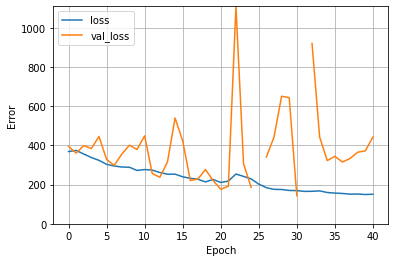

In [27]:
plot_history(training_history, keys=["loss", "val_loss"])

# Test the model

1/1 [==============================] - 0s 37ms/step
# of bboxes: 1, 0.42986956
Here Junk: 0.42986956238746643


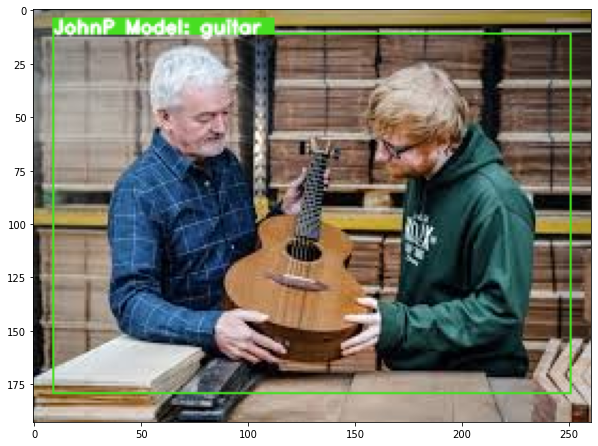

1/1 [==============================] - 0s 61ms/step
# of bboxes: 1, 0.40398064
Here Junk: 0.40398064255714417


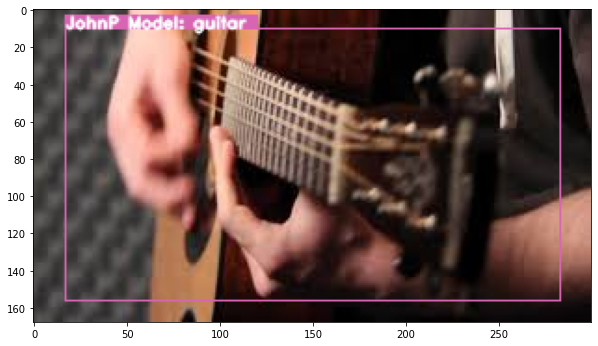

1/1 [==============================] - 0s 61ms/step
# of bboxes: 1, 0.40161568
Here Junk: 0.4016156792640686


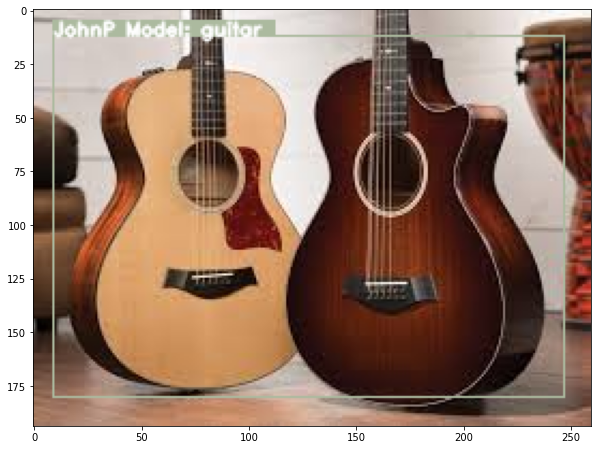

1/1 [==============================] - 0s 55ms/step
# of bboxes: 4, 0.4784642,0.47730485,0.4642112,0.42630327
Here Junk: 0.47846418619155884
Here Junk: 0.4773048460483551
Here Junk: 0.46421119570732117
Here Junk: 0.42630326747894287


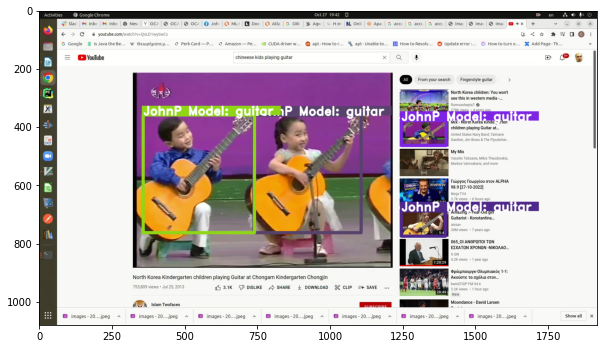

1/1 [==============================] - 0s 36ms/step
# of bboxes: 5, 0.53611976,0.4826323,0.47936866,0.34866846,0.3260809
Here Junk: 0.5361197590827942
Here Junk: 0.4826323091983795
Here Junk: 0.479368656873703
Here Junk: 0.3486684560775757
Here Junk: 0.32608088850975037


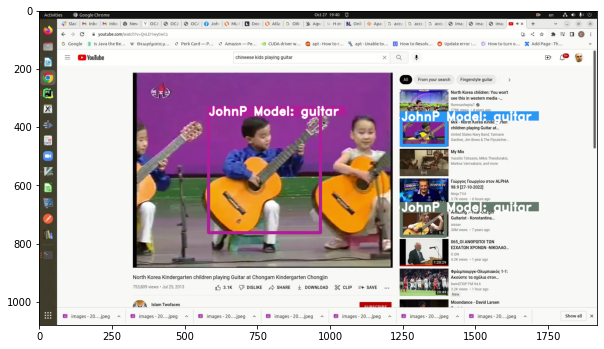

1/1 [==============================] - 0s 39ms/step
# of bboxes: 1, 0.3737613
Here Junk: 0.37376129627227783


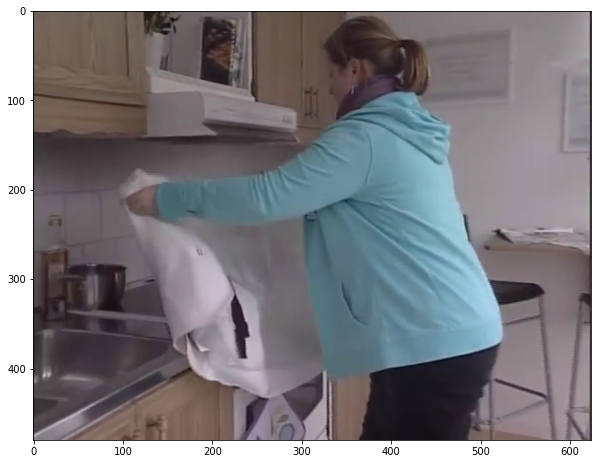

1/1 [==============================] - 0s 36ms/step
# of bboxes: 1, 0.3054633
Here Junk: 0.3054633140563965


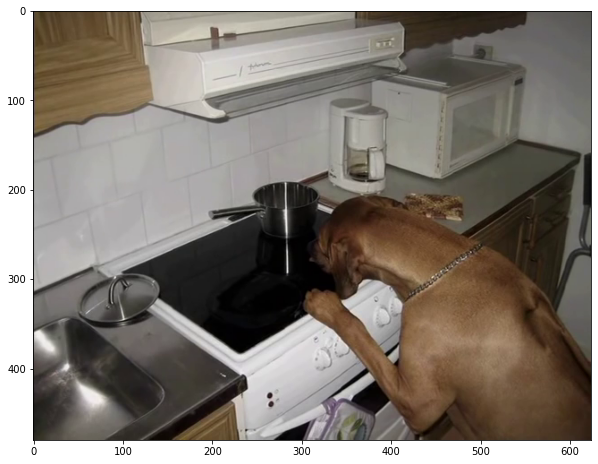

In [41]:
images = [ 
    "/home/john/repos/ML_Introduction/notebooks/data/guitars/testing/has-guitar/guitar-0568.jpeg",
    "/home/john/repos/ML_Introduction/notebooks/data/guitars/testing/has-guitar/guitar-0575.jpeg",
    "/home/john/repos/ML_Introduction/notebooks/data/guitars/testing/has-guitar/guitar-0562.jpeg",
    "/home/john/repos/ML_Introduction/notebooks/data/guitars/testing/has-guitar/guitar-0579.jpeg",
    "/home/john/repos/ML_Introduction/notebooks/data/guitars/testing/has-guitar/guitar-0582.jpeg",
    "/home/john/repos/ML_Introduction/notebooks/data/guitars/testing/no-guitar/no-guitar-0567.jpeg",
    "/home/john/repos/ML_Introduction/notebooks/data/guitars/testing/no-guitar/no-guitar-0577.jpeg"
]

for image in images:
    model.predict(image)